# 算数数学教育の暗黒面

黒木玄 (Gen Kuroki)

2018-08-21

* Copyright 2018 Gen Kuroki
* License: MIT https://opensource.org/licenses/MIT
* Repository: https://github.com/genkuroki/HighSchoolMath

このファイルは次の場所できれいに閲覧できる:

* <a href="http://nbviewer.jupyter.org/github/genkuroki/HighSchoolMath/blob/master/MathEduDarkSide.ipynb">高校数学の話題 HTML版</a>

* <a href="https://genkuroki.github.io/documents/HighSchoolMath/MathEduDarkSide.pdf">高校数学の話題 PDF版</a>

このノートの想定読者は大学である程度を数学を学んだ学生で高校で習った数学について見直したい人達である. 

このファイルは<a href="https://julialang.org/">Julia言語</a>カーネルの <a href="http://jupyter.org/">Jupyter notebook</a> である. 自分のパソコンに<a href="https://julialang.org/">Julia言語</a>をインストールしたい場合には

* <a href="http://nbviewer.jupyter.org/gist/genkuroki/81de23edcae631a995e19a2ecf946a4f">WindowsへのJulia言語のインストール</a>

を参照せよ. このファイルは <a href="https://juliabox.com/">JuliaBox</a> でも使用できるかもしれない. このファイル中の<a href="https://julialang.org/">Julia言語</a>のコードを理解できれば, <a href="https://julialang.org/">Julia言語</a>から<a href="https://www.sympy.org">SymPy</a>を用いた数式処理や数値計算の結果のプロットの仕方を学ぶことができる.

$
\newcommand\eps{\varepsilon}
\newcommand\ds{\displaystyle}
\newcommand\Z{{\mathbb Z}}
\newcommand\R{{\mathbb R}}
\newcommand\C{{\mathbb C}}
\newcommand\T{{\mathbb T}}
\newcommand\QED{\text{□}}
\newcommand\root{\sqrt}
\newcommand\bra{\langle}
\newcommand\ket{\rangle}
\newcommand\d{\partial}
\newcommand\sech{\operatorname{sech}}
\newcommand\cosec{\operatorname{cosec}}
\newcommand\sign{\operatorname{sign}}
\newcommand\sinc{\operatorname{sinc}}
\newcommand\arctanh{\operatorname{arctanh}}
\newcommand\sn{\operatorname{sn}}
\newcommand\cn{\operatorname{cn}}
\newcommand\cd{\operatorname{cd}}
\newcommand\dn{\operatorname{dn}}
\newcommand\real{\operatorname{Re}}
\newcommand\imag{\operatorname{Im}}
\newcommand\Li{\operatorname{Li}}
\newcommand\np[1]{:\!#1\!:}
\newcommand\PROD{\mathop{\coprod\kern-1.35em\prod}}
$

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#微分は分数商ではないのか？" data-toc-modified-id="微分は分数商ではないのか？-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>微分は分数商ではないのか？</a></span></li><li><span><a href="#高校数学における三角函数の微積分は循環論法なのか？" data-toc-modified-id="高校数学における三角函数の微積分は循環論法なのか？-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>高校数学における三角函数の微積分は循環論法なのか？</a></span></li><li><span><a href="#無理式とは根号内に文字を含む式のことなのか？" data-toc-modified-id="無理式とは根号内に文字を含む式のことなのか？-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>無理式とは根号内に文字を含む式のことなのか？</a></span></li><li><span><a href="#単項式は多項式ではないのか？" data-toc-modified-id="単項式は多項式ではないのか？-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>単項式は多項式ではないのか？</a></span></li><li><span><a href="#等式は方程式と恒等式に分類されるのか？" data-toc-modified-id="等式は方程式と恒等式に分類されるのか？-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>等式は方程式と恒等式に分類されるのか？</a></span></li><li><span><a href="#掛算には順序があるのか？" data-toc-modified-id="掛算には順序があるのか？-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>掛算には順序があるのか？</a></span></li><li><span><a href="#ゼロは倍数ではないのか？" data-toc-modified-id="ゼロは倍数ではないのか？-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>ゼロは倍数ではないのか？</a></span></li><li><span><a href="#必要条件は必要十分条件ではないのか？" data-toc-modified-id="必要条件は必要十分条件ではないのか？-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>必要条件は必要十分条件ではないのか？</a></span></li><li><span><a href="#文字を含む式は「操作の方法」でかつ「操作の結果」なのか？" data-toc-modified-id="文字を含む式は「操作の方法」でかつ「操作の結果」なのか？-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>文字を含む式は「操作の方法」でかつ「操作の結果」なのか？</a></span></li><li><span><a href="#括弧は1つの数量を表すための記号なのか？" data-toc-modified-id="括弧は1つの数量を表すための記号なのか？-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>括弧は1つの数量を表すための記号なのか？</a></span></li></ul></div>

In [1]:
using Plots
pyplot()
#gr(); ENV["PLOTS_TEST"] = "true"
#clibrary(:colorcet)
#clibrary(:misc)

function pngplot(P...; kwargs...)
    sleep(0.1)
    pngfile = tempname() * ".png"
    savefig(plot(P...; kwargs...), pngfile)
    showimg("image/png", pngfile)
end
pngplot(; kwargs...) = pngplot(plot!(; kwargs...))

showimg(mime, fn; scale="") = open(fn) do f
    base64 = base64encode(f)
    if scale == ""
        display("text/html", """<img src="data:$mime;base64,$base64">""")
    else
        display("text/html", """<img src="data:$mime;base64,$base64" width="$scale">""")
    end
end

using SymPy
#sympy[:init_printing](order="lex") # default
#sympy[:init_printing](order="rev-lex")

using SpecialFunctions
using QuadGK
using Elliptic.Jacobi: cd, sn

## 微分は分数商ではないのか？

一部に

>$\ds\frac{dy}{dx}$ は $dy \div dx$ の意味ではないので, $dx$ 分の $dy$ と読んではいけない.

と教えている先生がいるようだ. これは本当に正しいだろうか? 微分形式を含む現代数学における**微分**のスタイルを知っていれば, **そのような教え方は誤り**になるので注意しなければいけない.

実際, 高木貞治『<a href="https://www.google.co.jp/search?q=%E9%AB%98%E6%9C%A8%E8%B2%9E%E6%B2%BB+%E8%A7%A3%E6%9E%90%E6%A6%82%E8%AB%96">解析概論</a>』には以下のように書いてある.


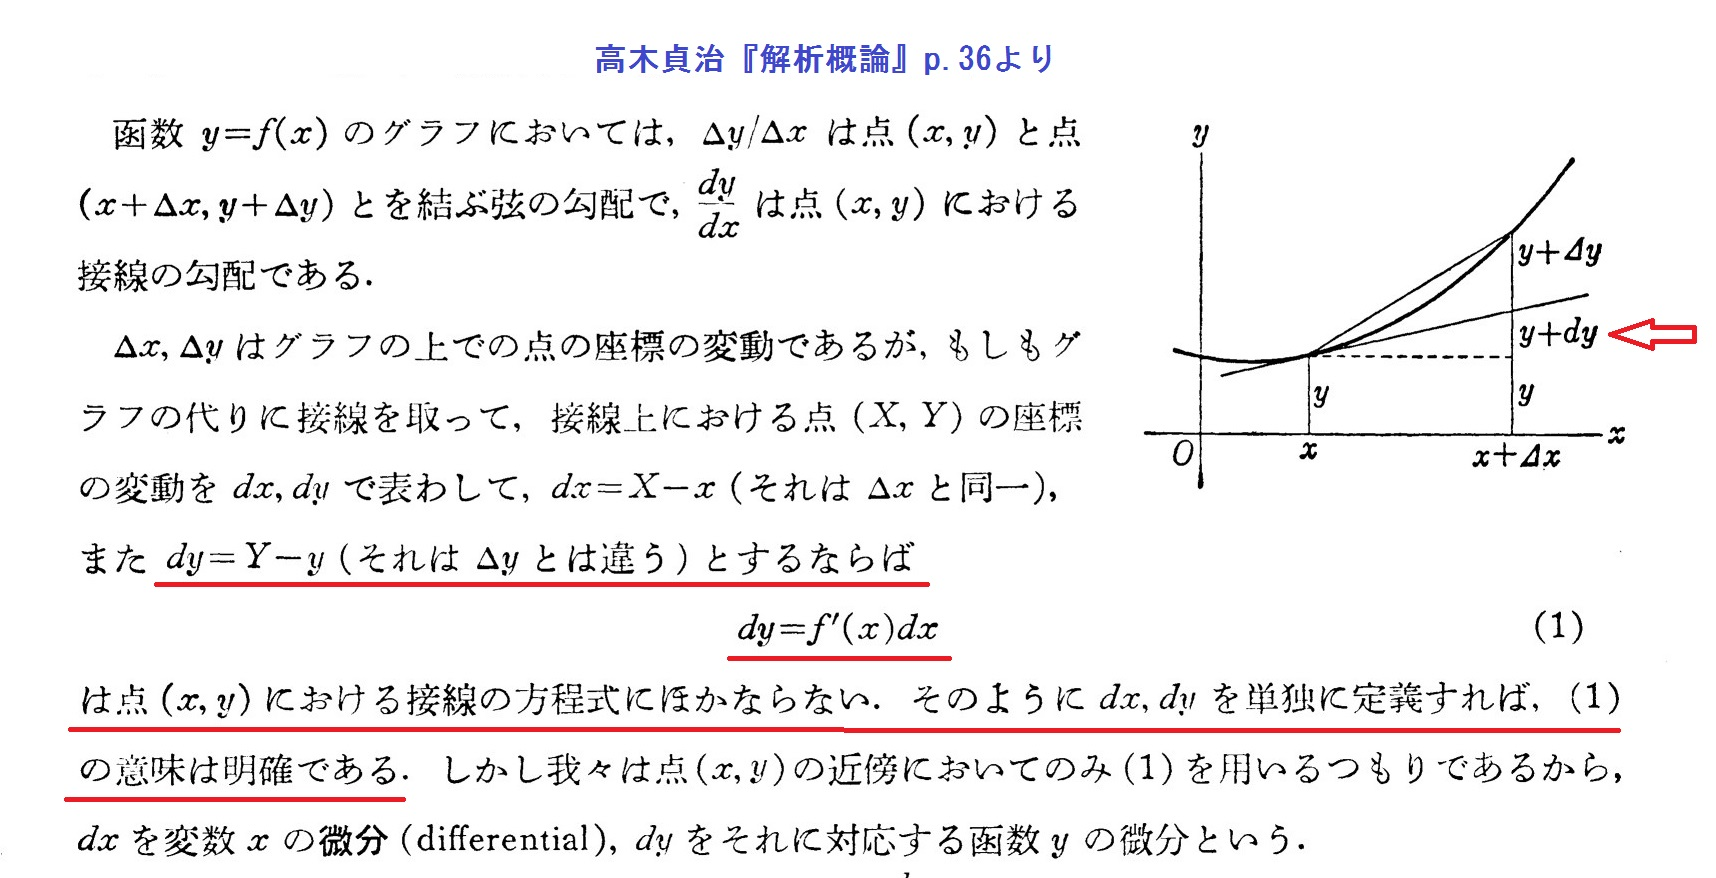

In [2]:
showimg("image/jpeg", "kaisekigairon-bibun1.jpg")


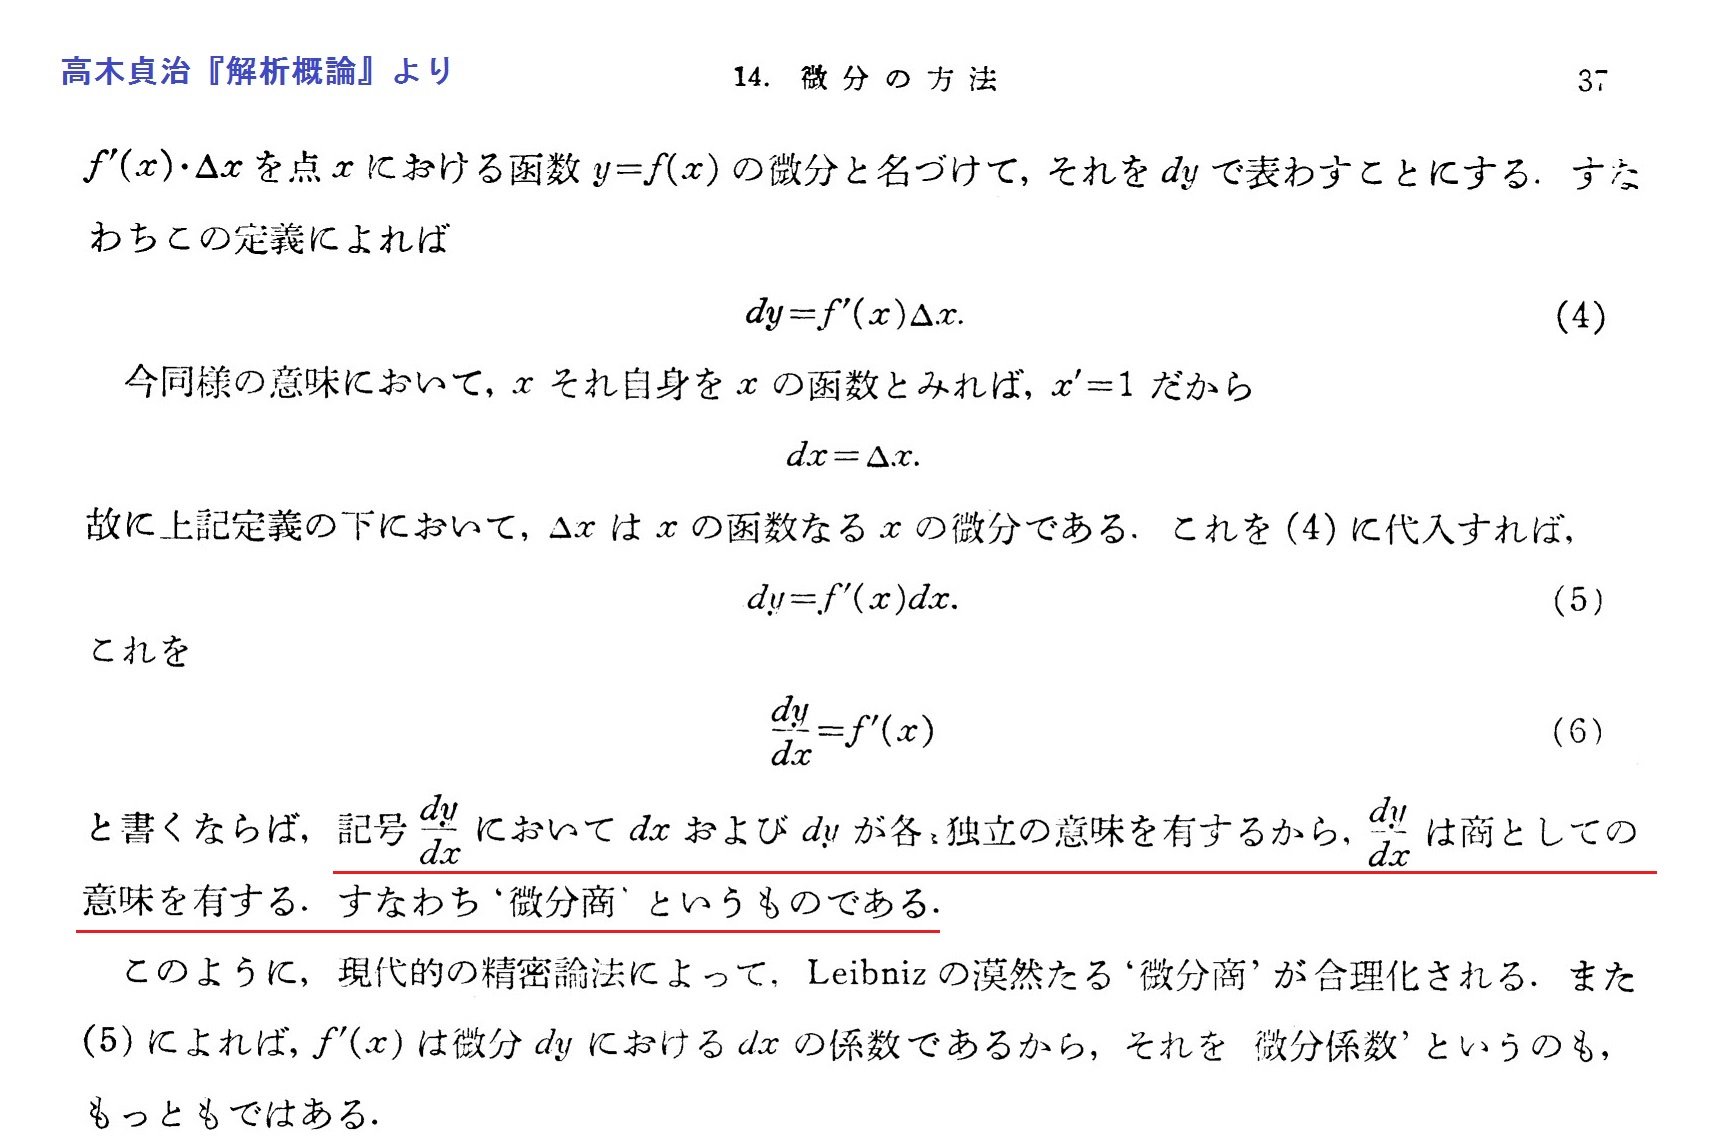

In [3]:
showimg("image/jpeg", "kaisekigairon-bibun2.jpg")

以上のように, 高木貞治『解析概論』には

> $\ds\frac{dy}{dx}$ は商として意味を有する.

とはっきり書いてある.  高木貞治氏による $dx$, $dy$ の定義は次の図と同じである.


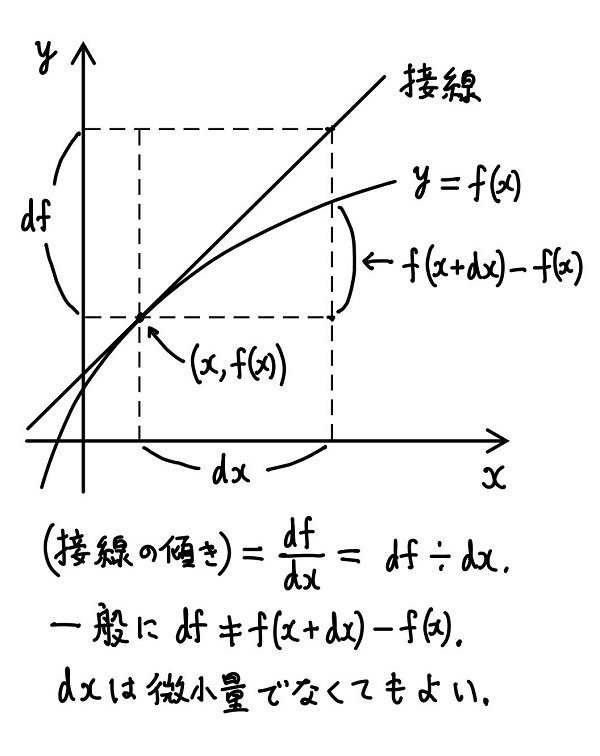

In [4]:
showimg("image/jpeg", "bibun.jpg")

$df$ の定義を $f(x+dx)-f(x)$ とするのではなく, 上の図のように取ることが, $\ds\frac{df}{dx}$ を真の分数商とみなすときのポイントになる. 数学の定義はこのような「みもふたもない」ものが多い. この図の $df$ の定義を一般化することによって1次の**微分形式**(differential form)が定義される. 微分形式は現代数学における基本的な概念である.

## 高校数学における三角函数の微積分は循環論法なのか？

答えは**いいえ**である.

高校数学IIIの教科書には「曲線の長さを速さの積分で表す公式」が書いてある. その公式を用いて単位円弧の長さを定義することによって, 弧度法の意味での角度を定義すれば循環論法にならないだけではなく, べき級数による天下り的な定義やその他様々な技巧をこらした三角函数の再定義を行う必要もなくなり, 高校数学のスタイルそのままの三角函数の定義に基き, さらに楕円函数論にも接続できるような三角函数論を展開できる.

数学的にはそういう事情になっているので, 数学を本当に理解する気があるならば, 「高校数学における三角函数の微積分は循環論法である」などと言ってはいけない.

実際の理論の展開の仕方の素描を「<a href="https://github.com/genkuroki/HighSchoolMath">高校数学の話題</a>」の方に書いておいたので参照して欲しい.

## 無理式とは根号内に文字を含む式のことなのか？

高校の数学の教科書を見ると,

>$\sqrt{x+1}$, $\sqrt{2x^2-3}$ などのように根号内に文字を含む式をその文字についての**無理式**といい, $x$ についての無理式で表された関数を $x$ の**無理関数**という. (実教出版『数学III』2009年1月25発行)

のように書いてある. これは高校の数学の教科書外では通用しない可能性が高い定義である. 

数については, $\sqrt{2}$ だけではなく, $\pi$ のような超越数も無理数に含まれる. 数と函数の類似に基けば, $\sin x$ のような超越函数も無理函数と呼びたくなるのだが, 上の定義に従うとそれは不可能になる.

さらに, 無理式の定義がおそろしくあいまいである. $\sqrt{\sin x}$ は無理式なのだろうか?

無理式(irrational expression)や無理函数(irrational function)は19世紀の数学の教科書に見付かる用語である. 19世紀の時代遅れなスタイルが伝言ゲームによって21世紀の現代まで伝わっているいるのだろう.

上に引用したような定義になっていない「定義」は数学の本質と無関係である. 数学を教えるときには, 歴史的な経緯や数学とは無関係の「大人の事情」によって不適切な記述が教科書に残ってしまうことがある. 

数学を教えるときには, 教科書に忠実に従うことは決して**やってはいけないこと**である. 

正しいか正しくないかを教科書に書いてあるかどうかで判断したり, 「そう言っている人達がたくさんいるから」という理由で判断したりすることは非数学的な態度だと思われる. 

## 単項式は多項式ではないのか？

非常に残念なことに, 中学校と高校の数学の教科書における用語の体系は以下のようになっているように見える.

| 中学高校の数学教科書 | 現代的には常識的なスタイル |
| :-----: | :-----: |
| 整式 | 多項式 |
| 単項式 | 単項式 |
| 多項式 | 複数の項を持つ多項式 |

現代ではほとんどの通信や放送がデジタル化されている. デジタル通信では情報の符号化とプライバシーを守るための暗号の技術が必要になる. それらの技術を理解するためには多項式環の理論も理解しておかなければいけない. そのような実用的な数学を学ぶためには, 現代的には常識的なスタイルの用語法に従う必要がある.

このような事情になっているにもかかわらず, 中学と高校の数学の教科書は19世紀以来の時代遅れのスタイルを採用してしまっている.  

この点は改善されるべきなのだが, そのような改善が行われる目途は現時点ではまったくない.

## 等式は方程式と恒等式に分類されるのか？

これも答えは**いいえ**である.  

これもまた「19世紀の時代遅れのスタイルが中学高校での数学教育に残ってしまっている」という事実の一部分に過ぎない.

19世紀の教科書には, equations (等式という意味)を identities (恒等式)と conditional equations (条件によって成立したり成立しなかったりする等式, 単に equation と書かれることも多い)に分けて説明するスタイルを採用しているものがあって, そのスタイルが日本語圏の中学高校の数学教育における「等式を恒等式と方程式に分けて説明するスタイル」として生き残っているものだと推測される. 

あらゆる等式は単に両辺が等しいことを意味する式(記号列)に過ぎない. 文脈によってニュアンスを変えたい場合に恒等式と呼んだり, 方程式と呼んだりするだけである.

数学を正しく理解するためにはそれらの曖昧な言葉に頼らずに「どのような条件のもとでどのような条件を満たす何を求めたいのか(何について考えているのか)」をクリアに考える必要がある.

例えば, $ax+b=c$ を $x$ に関する方程式とみなすときには, 「$a$, $b$, $c$ が与えられているときに, 等式 $ax+b=c$ を満たす $x$ を求めること」を考えていることになる.

例えば, $ax+b=c$ を $x$ に関する恒等式とみなすときには, 「すべての数 $x$ について等式 $ax+b=c$ が成立するような $a,b,c$ 」について考えていることになる.

「どのような条件のもとでどのような条件を満たす何を求めたいのか(何について考えているのか)」の普遍的なスタイルで常に考えるようにすれば19世紀由来の「等式を恒等式と方程式に分類するスタイル」は完全に忘れても大丈夫である.

## 掛算には順序があるのか？

## ゼロは倍数ではないのか？

## 必要条件は必要十分条件ではないのか？

## 文字を含む式は「操作の方法」でかつ「操作の結果」なのか？

## 括弧は1つの数量を表すための記号なのか？